In [1]:
import numpy as np

from scipy.io.wavfile import read
from scipy.fft import fft, fftfreq

from IPython.display import Audio

from math import log10

import matplotlib.pyplot as plt

# Audio Processing

Playing around loading, visualising and processing speech

In [2]:
Fs, data = read('sounds/f-news.wav')
N = len(data)

Fs

16000

In [3]:
Audio(data, rate=Fs)

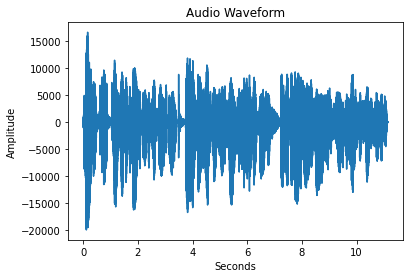

In [4]:
time_x = [i/Fs for i in range(N)] # samples to seconds
# data_db = [20 * log10(i/20e-6) for i in data]

plt.plot(time_x, data)
plt.xlabel('Seconds')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

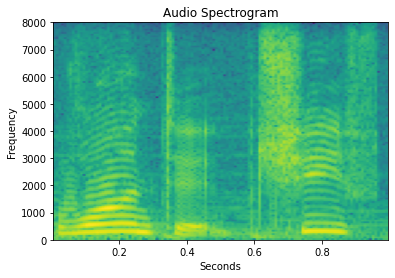

In [5]:
plt.specgram(data[0: 1 *Fs], Fs=Fs)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Audio Spectrogram')
plt.show()

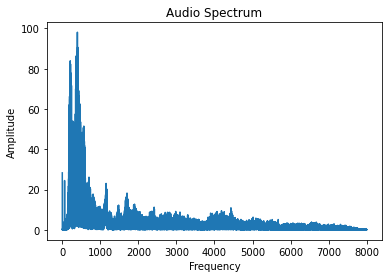

In [6]:
spectrum = np.abs(np.fft.rfft(data)[:int(N/2)]/N)
frequency_x = np.fft.rfftfreq(data.size, d=1/Fs)[:int(N/2)]

plt.plot(frequency_x, spectrum)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Audio Spectrum')
plt.show()

x: 89120, cep: 44561


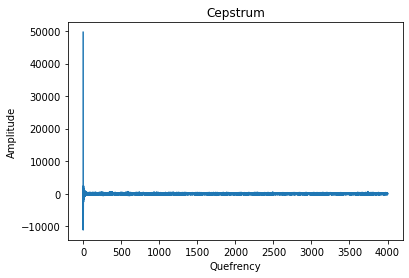

In [11]:
cepstrum = np.fft.rfft(np.log(spectrum))

plt.plot(frequency_x[:int(len(frequency_x)/2)], cepstrum[:int(len(frequency_x)/2)])
plt.xlabel('Quefrency')
plt.ylabel('Amplitude')
plt.title('Cepstrum')
plt.show()